In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape


data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
nx.__version__

'2.8.8'

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\jasme\AppData\Local\Temp\ipykernel_4380\3093572283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [5]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\jasme\AppData\Local\Temp\ipykernel_4380\4019421568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
C:\Users\jasme\AppData\Local\Temp\ipykernel_4380\4019421568.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [6]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\jasme\AppData\Local\Temp\ipykernel_4380\707532253.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [8]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [9]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [10]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [11]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

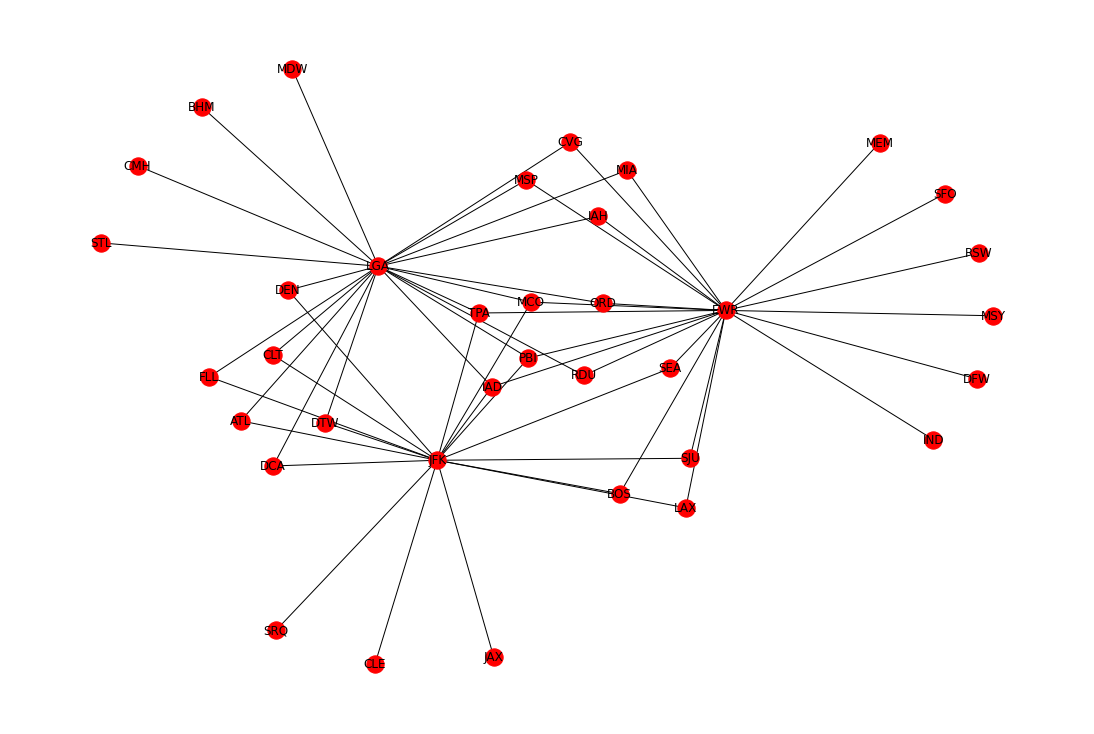

In [13]:
# your code is here (Quick view of the Graph.) 
plt.figure(figsize = (15, 10))
nx.draw(FG, with_labels = True, node_color = 'red')

In [14]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
# Calculate average edge density of the Graph

# your code is here
nx.density(FG)

0.09047619047619047

In [15]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [16]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [17]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
    print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [18]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [19]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. Please fill "your code here" sections on above cells (10 Points).

2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



### Maximal cliques

In [20]:
print(f'Maximal cliques = {len(list(nx.find_cliques(FG)))}')

Maximal cliques = 57


### Busiest Airports

In [21]:
# The busiest airports can be found using the degree of the node
degrees = dict(nx.degree(FG))
max_degree = max(degrees.values()) 
print("The busiest airports are:")
for i in degrees.items():
    if (i[1] == max_degree):
        print(i[0])

The busiest airports are:
EWR
LGA


In [22]:
sorted(degrees.items(), key = lambda x: x[1], reverse = True)[:10]

[('EWR', 20),
 ('LGA', 20),
 ('JFK', 17),
 ('PBI', 3),
 ('MCO', 3),
 ('IAD', 3),
 ('TPA', 3),
 ('FLL', 2),
 ('SEA', 2),
 ('DEN', 2)]

## As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)

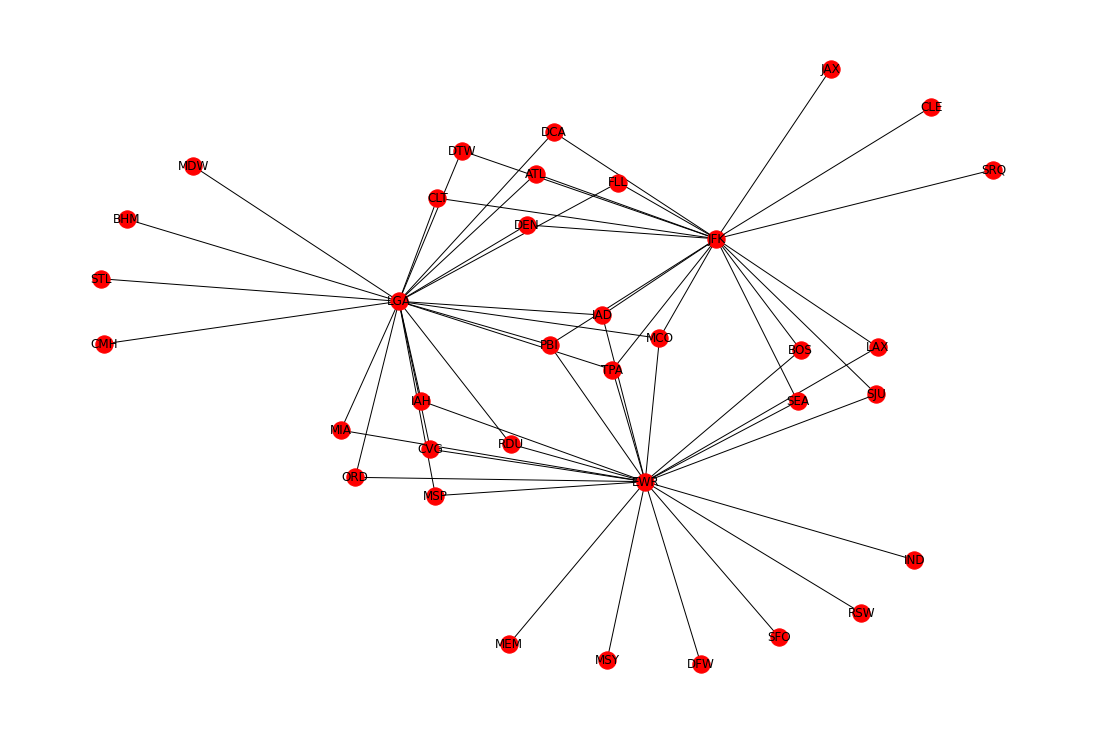

In [23]:
plt.figure(figsize = (15, 10))
nx.draw(FG, with_labels = True, node_color = 'red')

In [24]:
nx.is_directed(FG)

False

#### Since the graph is undirected, this means that we can assume that if route between ORD and LAX exists, the route also exists between LAX and ORD.

In [29]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]


### Just using the degrees to predict nodes recommends flight between EWR, JFK and LGA but since they're in the same area, it doens't make sense, so we'll need to modify it

In [53]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        if(n1 == 'EWR' or n1 == 'LGA' or n1 == 'JFK'):
            if(n2 == 'EWR' or n2 == 'LGA' or n2 == 'JFK'):
                continue
        
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count >= all_counts[-6]]
print(top10_pairs[-6:])

[('PBI', 'IAD'), ('DCA', 'DTW'), ('ATL', 'DTW'), ('TPA', 'DTW'), ('DEN', 'DTW'), ('DEN', 'MCO')]


### Using the above function, the 6 new routes I recommend are:
1. PBI - IAD
2. DCA - DTW
3. ATL - DTW
4. TPA - DTW
5. DEN - DTW
6. DEN - KCO

### However, we have to be aware of the following assumptions and have to consider more factors before recommending routes:
#### 1. We should add flights between cities that stop at EWR, LGA or JFK but are also connected to multiple NYC airports i.e having degree >= 2.
#### 2. Airports that are located near popular tourists destination.
#### 3. Airports that have low associated costs but high enough traffic to warrant creation of routes.
#### 4. Other competing airlines' routes